In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Import data
df = pd.read_csv('/Users/zhariko_ov/Desktop/VsCode/Data Science with Python (FreeCodeCamp)/Projects/data/medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Data description

* ap_hi - Systolic blood pressure
* ap_lo - Diastolic blood pressure
* gluc - Glucose
* alco - Alcohol intake
* active - Physical activity
* cardio - Presence or absence of cardiovascular disease


# sns Categorical Plot

In [11]:
# Add 'overweight' column
BMI = df['weight'] / ((df['height'] * 0.01) ** 2)
df['overweight'] = BMI.apply(lambda x: 1 if x > 25 else 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [12]:
'''Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 
'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.'''

df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df[['overweight', 'gluc']].head()

,overweight,gluc
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [13]:
'''Create DataFrame for cat plot using just the values 
from 'cholesterol', 'gluc', 'smoke', 'alco', 'active' and 'overweight.'''

df_cat = pd.melt(df, id_vars = 'cardio', value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


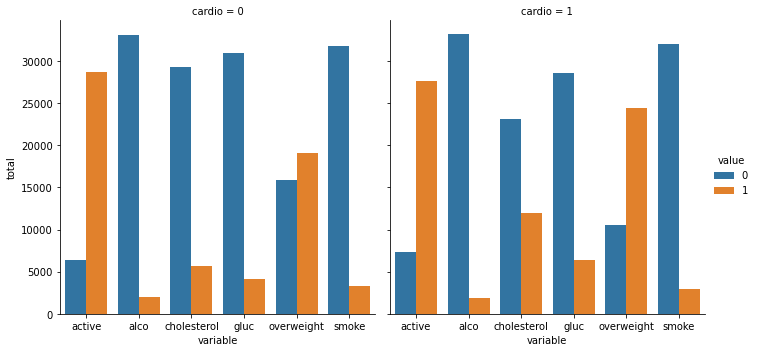

In [14]:
# Draw the catplot
fig = sns.catplot(x="variable", col='cardio', hue="value", data=df_cat, kind='count') # col='' group and plot two separate plots for two value
fig.axes[0,0].set_ylabel('total')
fig = fig.figure

# sns Heat Map

In [15]:
'''Clean the data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile'''

df_heat = df[
             (df['ap_lo']<=df['ap_hi']) &
             (df['height'] >= df['height'].quantile(0.025))&
             (df['height'] <= df['height'].quantile(0.975))&
             (df['weight'] >= df['weight'].quantile(0.025))&
             (df['weight'] <= df['weight'].quantile(0.975))
             ]

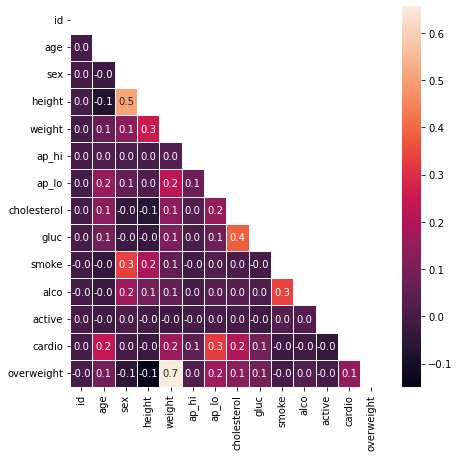

In [16]:
# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the lower triangle
mask = np.triu(corr)

# Set up the matplotlib figure
plt.figure(figsize=(7, 7))

# Draw the heatmap
dataplot = sns.heatmap(corr, annot=True, mask=mask, linewidths=1, fmt=".1f")